# Pothole Detection



In this notebook we are going to download the complete dataset from github. Then we are going to put the images into two different folders - one for images that include a pothole and another for images that have no potholes. This is based off the provided image masks. We then download this new version of the dataset which will be used in another notebook.


### Install and Import Dependencies

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches
import os
from sklearn.model_selection import train_test_split
from tensorflow import keras
import pandas as pd
import seaborn as sns

### Data

This data comes from the [Cracks and Potholes in Road Images Dataset](https://github.com/biankatpas/Cracks-and-Potholes-in-Road-Images-Dataset/tree/master/Dataset). It is licensed under the MIT License, giving us permission to modify and distribute the data for both private and commercial use.

DATA DESCRIPTION

In [ ]:
import platform
mysystem = platform.system()
# We need to first download the data here:
file_download_link = "https://drive.google.com/uc?id=1UtmZVlw3i4cro86Y2uITR1IzmUWvXb7H&authuser=0&export=download&confirm=t"
# Check for windows

if mysystem != 'Windows':
    !wget -O dataset.zip --no-check-certificate "$file_download_link"
    !unzip -q dataset.zip

else:
  print('Please download the data using the following link:', file_download_link)

--2022-12-06 00:47:22--  https://drive.google.com/uc?id=1UtmZVlw3i4cro86Y2uITR1IzmUWvXb7H&authuser=0&export=download&confirm=t
Resolving drive.google.com (drive.google.com)... 142.251.163.139, 142.251.163.101, 142.251.163.100, ...
Connecting to drive.google.com (drive.google.com)|142.251.163.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-08-bc-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/i69s2475ru8ujsquqelg0r9p4p7kd0t7/1670287575000/08578286333174156629/*/1UtmZVlw3i4cro86Y2uITR1IzmUWvXb7H?e=download&uuid=579dea6e-711d-4ab4-bc17-5bcb0c93d006 [following]
--2022-12-06 00:47:22--  https://doc-08-bc-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/i69s2475ru8ujsquqelg0r9p4p7kd0t7/1670287575000/08578286333174156629/*/1UtmZVlw3i4cro86Y2uITR1IzmUWvXb7H?e=download&uuid=579dea6e-711d-4ab4-bc17-5bcb0c93d006
Resolving doc-08-bc-docs.googleusercontent.com (doc-08-bc-docs.googleusercontent.com)

### Create Dataset

The first step is to create the dataset with the images, their labels, and the parameters for the pothole bounding boxes. We will use **keras** to load and convert images to numpy arrays, and **cv2** to detect the potholes and label them. We store the dataset as a csv file.

Below is an example of how cv2 creates a bounding box around a pothole using the provided masks.

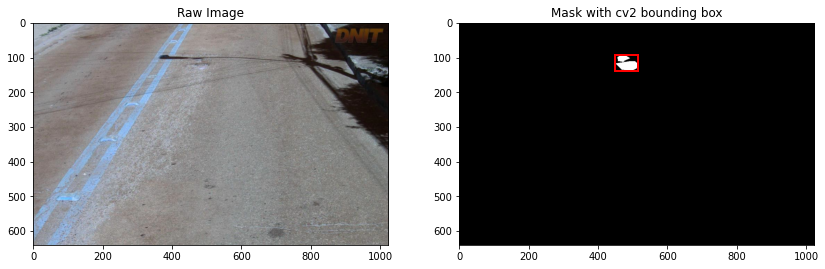

In [ ]:
master = '/content/biankatpas-Cracks-and-Potholes-in-Road-Images-Dataset-1f20054/Dataset'
path = master + "/820315_ES_259_259ES000000_03060/820315_ES_259_259ES000000_03060_RAW.jpg"
raw_img = cv2.imread(path)
path = master + "/820315_ES_259_259ES000000_03060/820315_ES_259_259ES000000_03060_POTHOLE.png"
mask = cv2.imread(path, 0)
x,y,w,h = cv2.boundingRect(mask)
fig, axs = plt.subplots(1,2, figsize=(14,20))
axs[0].set_title("Raw Image")
axs[0].imshow(raw_img)
axs[1].set_title("Mask with cv2 bounding box")
axs[1].imshow(mask, cmap= 'gray')
axs[1].add_patch(patches.Rectangle((x,y),w,h, fill=False, edgecolor='red', lw=2))

In [ ]:
! mkdir processed_data
! mkdir processed_data/with_potholes
! mkdir processed_data/without_potholes

In [ ]:
# Create Train/Validation csv

master = '/content/biankatpas-Cracks-and-Potholes-in-Road-Images-Dataset-1f20054/Dataset'
samples = os.listdir(master)
for i, sample in enumerate(samples):
    # Path for Raw Image
    img_path = f'{master}/{sample}/{sample}_RAW.jpg'
    mask_path = f'{master}/{sample}/{sample}_POTHOLE.png'

    # Load image into ram
    # We resize it to (600, 600) and convert to grayscale
    mask = keras.preprocessing.image.load_img(img_path, color_mode = 'grayscale')
    mask = keras.preprocessing.image.img_to_array(mask)
    new_name = f'{i:04}'

    if 255. in mask: # If there is some shape in the mask
      # Move to directory with potholes
      !mv "$img_path"  /content/processed_data/with_potholes
    else:
      # Move to no pothole directory
      !mv "$img_path" /content/processed_data/without_potholes
    

    


In [ ]:
!zip -r /content/file.zip /content/processed_data/
from google.colab import files
files.download("/content/file.zip")


  adding: content/processed_data/ (stored 0%)
  adding: content/processed_data/with_potholes/ (stored 0%)
  adding: content/processed_data/with_potholes/916877_RS_290_290RS294095_17835_RAW.jpg (deflated 1%)
  adding: content/processed_data/with_potholes/1080089_DF_010_010BDF0030_1_03336_RAW.jpg (deflated 2%)
  adding: content/processed_data/with_potholes/1014709_RS_386_386RS124739_30470_RAW.jpg (deflated 1%)
  adding: content/processed_data/with_potholes/915946_RS_290_290RS294095_13181_RAW.jpg (deflated 1%)
  adding: content/processed_data/with_potholes/1093203_DF_251_251BDF0052_01334_RAW.jpg (deflated 1%)
  adding: content/processed_data/with_potholes/1093534_DF_251_251BDF0052_01931_RAW.jpg (deflated 1%)
  adding: content/processed_data/with_potholes/917186_RS_290_290RS294095_19380_RAW.jpg (deflated 1%)
  adding: content/processed_data/with_potholes/1014683_RS_386_386RS124739_30340_RAW.jpg (deflated 0%)
  adding: content/processed_data/with_potholes/1014806_RS_386_386RS124739_30955_RA

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>